# NYC Bridge Crossings - Poisson regression model

Poisson regression model for regressing the bicyclist counts observed on the Brooklyn bridge between 01 April 2017 and 31 October 2017.

Source: https://timeseriesreasoning.com/contents/poisson-regression-model/

The project starts with the Poisson regression model and use it as the “control” for the Negative Binomial regression model in part 2 of this project. Cameron and Trivedi recommend best practice is to estimate both Poisson and Negative Binomial regression models (Cameron and Trivedi, 2013).


## Project Objective
The purpose of this project is to predict daily counts of bicyclists on the Brooklyn bridge 

## Importing the Python Packages

import the required Python packages.

In [50]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
import matplotlib.pyplot as plt # used for visualisations
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') # error handling
import seaborn as sns # a more user-friendly library used for visualisations
sns.set_theme(rc={'figure.figsize':(8,6)})
import statistics
from patsy import dmatrices
import statsmodels.api as sm
from scipy.stats import pearsonr # import pearsonr function to calculate  Pearson correlation coefficient


## 1. Collect the Data

Import the data into a dataframe called `df`.

In [51]:
dfr = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Portfolio - Data Science Professional Practice/New York City - East River Bicycle Crossings/Bikes.xlsx")

To verify that the import worked as expected, preview the data using the `head()` method.

In [52]:
dfr.head()

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,2017-04-01,46.0,37.0,0.00,606
1,2017-04-02,62.1,41.0,0.00,2021
2,2017-04-03,63.0,50.0,0.03,2470
3,2017-04-04,51.1,46.0,1.18,723
4,2017-04-05,63.0,46.0,0.00,2807


## 2. Tidy up the data set
Check the data set for any missing data

In [53]:
dfr.isnull().sum(axis=0)

Date        0
HIGH_T      0
LOW_T       0
PRECIP      0
BB_COUNT    0
dtype: int64

The dataset does not have any missing values.  
  
From `date` extract the following derived variables:  
* Month
* Day_of_week
* Day  
Convert Date to datetime format by using `infer_datetime_format=True` 

In [54]:
dfr['Date'] = pd.to_datetime(dfr['Date'],infer_datetime_format=True)

Extract the derived variables

In [55]:
dfr['Month'] = dfr['Date'].dt.month
dfr['Day'] = dfr['Date'].dt.day
dfr['Day_of_Week'] = dfr['Date'].dt.dayofweek

`Date` is no longer needed so drop it from the data frame using the `.drop()` method.

In [56]:
df = dfr.drop('Date', axis=1)

In [57]:
df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,Month,Day,Day_of_Week
0,46.0,37.0,0.00,606,4,1,5
1,62.1,41.0,0.00,2021,4,2,6
2,63.0,50.0,0.03,2470,4,3,0
3,51.1,46.0,1.18,723,4,4,1
4,63.0,46.0,0.00,2807,4,5,2


The dataset has seven columns. Six - `HIGH_T`,  `LOW_T`, `PRECIP`,  `Month`, `Day` and `Day_of_Week` - are the predictors (or independent variables), while - `BB_COUNT` - is the response (or dependent variable).

## 2. Explore the Data
A concise summary data tructure by calling the info() method.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HIGH_T       214 non-null    float64
 1   LOW_T        214 non-null    float64
 2   PRECIP       214 non-null    float64
 3   BB_COUNT     214 non-null    int64  
 4   Month        214 non-null    int64  
 5   Day          214 non-null    int64  
 6   Day_of_Week  214 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 11.8 KB


There are 214 instances (or rows) in the dataset.

The dataset consists of 7 features (or columns). 

Summary statistics for the numeric features in the data by calling the describe() method.

In [59]:
df.describe()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,Month,Day,Day_of_Week
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.201869,62.027103,0.132430,2680.042056,7.009346,15.789720,3.000000
std,10.390443,9.305792,0.394004,854.710864,2.002324,8.848102,2.016365
min,46.000000,37.000000,0.000000,151.000000,4.000000,1.000000,0.000000
25%,66.900000,55.225000,0.000000,2298.000000,5.000000,8.000000,1.000000
50%,75.900000,64.000000,0.000000,2857.000000,7.000000,16.000000,3.000000
75%,82.000000,70.000000,0.037500,3285.000000,9.000000,23.000000,5.000000
max,93.900000,78.100000,3.030000,4960.000000,10.000000,31.000000,6.000000


<span style="color:red">**Note :**</span>  there are no discernible outliers within the dataset

### 2.2 Verifying the correlation between the predictors and response variables

#### 2.2.1 Correlation between High Temperature and bike crossings.


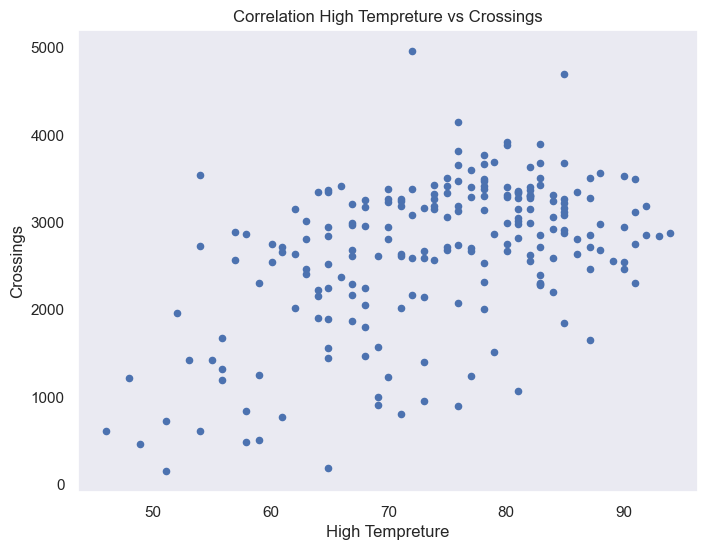

In [60]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'HIGH_T', y = 'BB_COUNT')
plt.title('Correlation High Tempreture vs Crossings')
plt.xlabel('High Tempreture')
plt.ylabel('Crossings')
plt.grid(False)

#### 2.2.1. Results:

In [61]:
htc = pearsonr(df['HIGH_T'], df['BB_COUNT'])
htc

PearsonRResult(statistic=0.49404146917932307, pvalue=1.4356376824759527e-14)

#### 2.2.1. Observations:
Pearson correlation coefficient (r) = `0.4940`indicates a <span style="color:green">**moderate positive correlation**</span> between the high temperature `[HIGH_T]`and bicycle crossings `[BB_COUNT]`
 
Two-tailed p-value (p) = `1.4356`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between high temperature `[HIGH_T]`and bicycle crossings `[BB_COUNT]`


#### 2.2.2 Correlation between Low Temperature and bike crossings.

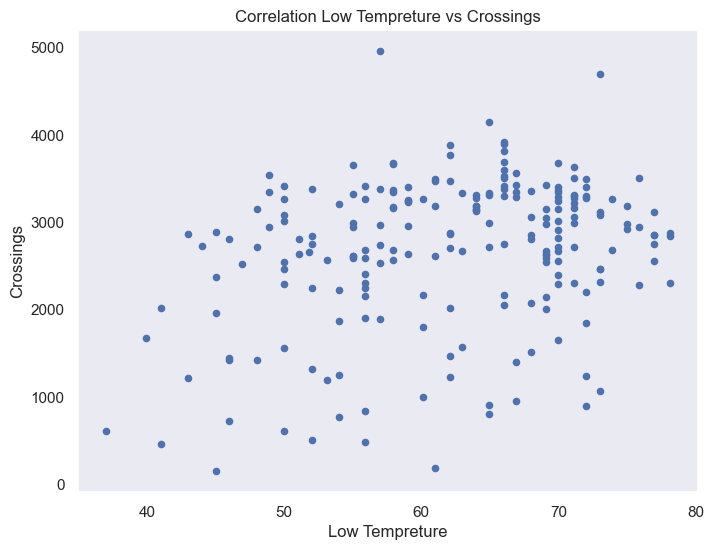

In [62]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'LOW_T', y = 'BB_COUNT')
plt.title('Correlation Low Tempreture vs Crossings')
plt.xlabel('Low Tempreture')
plt.ylabel('Crossings')
plt.grid(False)

#### 2.2.2. Results:

In [63]:
ltc = pearsonr(df['LOW_T'], df['BB_COUNT'])
ltc

PearsonRResult(statistic=0.2942272625472554, pvalue=1.2075292130639781e-05)

#### 2.2.2. Observations:
Pearson correlation coefficient (r) = `0.2942`indicates a <span style="color:red">**weak positive correlation**</span> between the low temperature `[LOW_T]`and bicycle crossings `[BB_COUNT]`
 
Two-tailed p-value (p) = `1.2075`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between low temperature `[LOW_T]`and bicycle crossings `[BB_COUNT]`

#### 2.2.3 Correlation between Low Temperature and bike crossings.

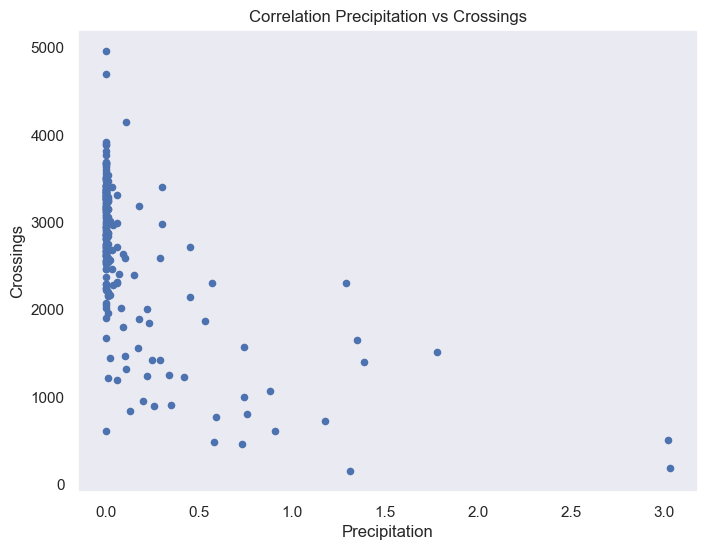

In [64]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'PRECIP', y = 'BB_COUNT')
plt.title('Correlation Precipitation vs Crossings')
plt.xlabel('Precipitation')
plt.ylabel('Crossings')
plt.grid(False)

#### 2.2.3. Results:

In [65]:
pbc = pearsonr(df['PRECIP'], df['BB_COUNT'])
pbc

PearsonRResult(statistic=-0.5796125067528879, pvalue=1.331790088659778e-20)

#### 2.2.3. Observations:
Pearson correlation coefficient (r) = `- 0.5796`indicates a <span style="color:green">**moderate negative correlation**</span> between precipitation `[PRECIP]`and bicycle crossings `[BB_COUNT]`
 
Two-tailed p-value (p) = `1.3318`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between precipitation `[PRECIP]`and bicycle crossings `[BB_COUNT]`

## 3. Prepare the Data for the data model

#### 3.1. Create the training and testing data sets.

In [66]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=170
Testing data set length=44


#### 3.2. Setup the regression expression
This expression is telling patsy that `BB_COUNT` is the response variable and the predictor variables are `DAY`, `DAY_OF_WEEK`, `MONTH`, `HIGH_T`, ` LOW_T` and `PRECIP`

In [67]:
expr = """BB_COUNT ~ Day  + Day_of_Week + Month + HIGH_T + LOW_T + PRECIP"""

#### 3.3. Create the train and test data sets
Set up the x and y matrices for the training and testing data sets. Patsy makes this really simple

In [68]:
y_train, x_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, x_test = dmatrices(expr, df_test, return_type='dataframe')

### 4.1. Training the Poisson Regression Model

Use the `statsmodels GLM class` class from the `statsmodels` package to train the model.

In [69]:
poisson_training_results = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

### 4.2. Reviewing the training summary
Print the training summary

In [70]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  170
Model:                            GLM   Df Residuals:                      163
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12014.
Date:                Sat, 18 Jan 2025   Deviance:                       22390.
Time:                        10:49:58   Pearson chi2:                 2.21e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.9636      0.013    545.541      

### 4.3. Predictions on the test data set

In [71]:
poisson_predictions = poisson_training_results.get_prediction(x_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
predictions_summary_frame.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper
4,2615.497775,10.690434,2594.628614,2636.534791
6,1782.806656,9.706086,1763.884213,1801.932094
23,2438.067169,10.844218,2416.905268,2459.414359
35,1927.355358,7.398698,1912.908592,1941.911228
36,1833.626188,9.609995,1814.887352,1852.558504


### 4.4. Prediccted vs Actual bike counts across Brooklyn Bridge
Plot the the predicted counts versus the actual counts for the test data

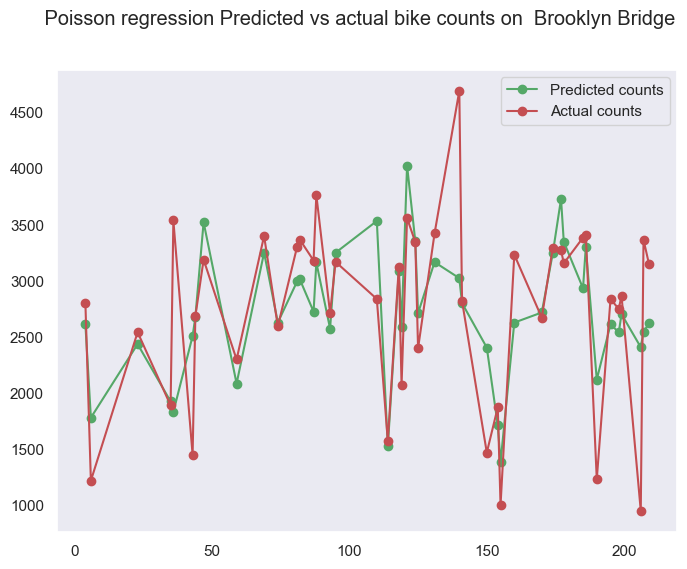

In [72]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['BB_COUNT']
fig = plt.figure()
fig.suptitle(' Poisson regression Predicted vs actual bike counts on  Brooklyn Bridge')
predicted, = plt.plot(x_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.grid(False)
plt.show()

<Figure size 800x600 with 0 Axes>

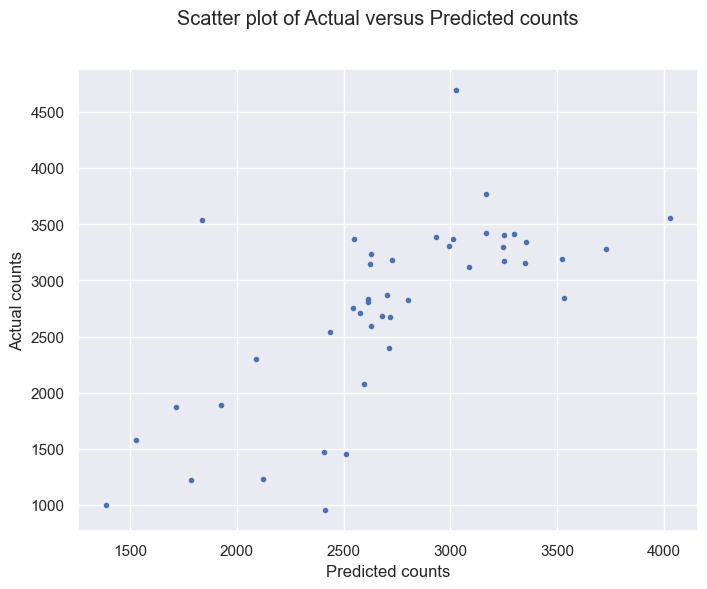

In [73]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

### 5. Conclusion

The model appears to be tracking the trend in the actual counts. 
<span style="color:red">However</span> a significant number of the <span style="color:red">**predictions are inaccurate**</span> when compared to the actual value.




In [74]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  170
Model:                            GLM   Df Residuals:                      163
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12014.
Date:                Sat, 18 Jan 2025   Deviance:                       22390.
Time:                        10:49:58   Pearson chi2:                 2.21e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.9636      0.013    545.541      

<span style="color:red">**Note:**</span> *“A common source of failure of the Poisson regression model is that the data does not satisfy the mean = variance criterion imposed by the Poisson distribution”*.   (Source:https://timeseriesreasoning.com/contents/poisson-regression-model/ )

#### 5.1 Interpretation of this model’s statistics 
* Deviance: 	24266.0
* Pearson chi2:	2.43  
The above to values are very large and a good it unlikely (despite the reasonable plot).  

* DF Residuals 	= No. Observations minus DF model
                = 179 – 6 = 173	

At p=0.05 and DF Residuals = 173, the chi-squared value (chi2) from a standard Chi-Squared table is 224.660 (Source:https://www.medcalc.org/manual/chi-square-table.php ). This value is much smaller than this model’s reported Deviance = 24266 and Pearson chi2 = 24300. Therefore despite a reasonable visual fit or the test data the it is statistically poor. (Source:https://timeseriesreasoning.com/contents/poisson-regression-model/)
